#  Categorical Variables

---

A categorical variable, as the name suggests, is used to represent categories or labels. For instance, a categorical variable could represent major cities in the world, the four seasons in a year, or the industry (oil, travel, technology) of a company. The number of category values is always finite in a real-world dataset. The values may be represented numerically. However, unlike other numeric variables, the values of a categorical variable cannot be ordered with respect to one another. (Oil is neither greater than nor less than travel as an industry type.) They are called nonordinal.

The vocabulary of a document corpus can be interpreted as a large categorical variable, with the categories being unique words. It can be computationally expensive to represent so many distinct categories. If a category (e.g., word) appears multiple times in a data point (document), then we can represent it as a count, and represent all of the categories through their count statistics. This is called bin counting. We start this discussion with common representations of categorical variables, and eventually meander our way to a discussion of bin counting for large categorical variables, which are very common in modern datasets.

## Encoding Categorical Variables

The categories of a categorical variable are usually not numeric. For example, eye color can be “black,” “blue,” “brown,” etc. Thus, an encoding method is needed to turn these nonnumeric categories into numbers. It is tempting to simply assign an integer, say from 1 to k, to each of k possible categories—but the resulting values would be orderable against each other, which should not be permissible for categories. So, let’s look at some alternatives.



### One-Hot Encoding

A better method is to use a group of bits. Each bit represents a possible category. If the variable cannot belong to multiple categories at once, then only one bit in the group can be “on.” This is called one-hot encoding, and it is implemented in scikit-learn as sklearn.preprocessing.OneHotEncoder. Each of the bits is a feature. Thus, a categorical variable with k possible categories is encoded as a feature vector of length k. 

| 	| e1|	e2|	e3|
|---|---|---|---|
|San Francisco	| 1|	0|	0|
|New York	| 0|	1|	0|
|Seattle	 | 0|	0|	1|

One-hot encoding is very simple to understand, but it uses one more bit than is strictly necessary. If we see that k–1 of the bits are 0, then the last bit must be 1 because the variable must take on one of the k values. Mathematically, one can write this constraint as “the sum of all bits must be equal to 1”:

$$
e_1 + e_2 + \dots + e_k = 1
$$

Suppose we have some data about apartment rental prices in three cities: San Francisco, New York, and Seattle.

We can train a linear regressor to predict rental price based solely on the identity of the city.
The linear regression model can be written as:
$$
y = w_1x_1 + \dots + w_nx_n + b
$$

(It is customary to fit an extra constant term called the intercept, so that y can be a nonzero value when the x’s are zeros.)

In [1]:
import pandas as pd
from sklearn import linear_model

In [2]:
df = pd.DataFrame({'City': ['SF', 'SF', 'SF', 'NYC', 'NYC', 'NYC', 'Seattle', 'Seattle', 'Seattle'],
                   'Rent': [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501]})
df

,City,Rent
0,SF,3999
1,SF,4000
2,SF,4001
3,NYC,3499
4,NYC,3500
5,NYC,3501
6,Seattle,2499
7,Seattle,2500
8,Seattle,2501


In [3]:
one_hot_df = pd.get_dummies(df, prefix=['city'])

one_hot_df

,Rent,city_NYC,city_SF,city_Seattle
0,3999,False,True,False
1,4000,False,True,False
2,4001,False,True,False
3,3499,True,False,False
4,3500,True,False,False
5,3501,True,False,False
6,2499,False,False,True
7,2500,False,False,True
8,2501,False,False,True


In [4]:
lin_reg = linear_model.LinearRegression()

In [5]:
lin_reg.fit(one_hot_df[['city_NYC', 'city_SF', 'city_Seattle']], one_hot_df['Rent'])

LinearRegression()

In [6]:
lin_reg.coef_

array([ 166.66666667,  666.66666667, -833.33333333])

With one-hot encoding, the intercept term represents the global mean of the target variable, Rent, and each of the linear coefficients represents how much that city’s average rent differs from the global mean.

In [7]:
lin_reg.intercept_

3333.3333333333335

In [8]:
# One-hot encoding weights + intercept
w1 = lin_reg.coef_
b1 = lin_reg.intercept_

In [9]:
df['Rent'].mean()

3333.3333333333335

### Dummy Coding

The problem with one-hot encoding is that it allows for k degrees of freedom, while the variable itself needs only k–1. Dummy coding2 removes the extra degree of freedom by using only k–1 features in the representation (see Table 5-2). One feature is thrown under the bus and represented by the vector of all zeros. This is known as the *reference category*. 

| 	| e1|	e2|	
|---|---|---|
|San Francisco	| 1|	0|	
|New York	| 0|	1|	
|Seattle	 | 0|	0|	

The outcome of modeling with dummy coding is more interpretable than with one-hot encoding.

In [10]:
dummy_df = pd.get_dummies(df, prefix=['city'], drop_first=True)
dummy_df

,Rent,city_SF,city_Seattle
0,3999,True,False
1,4000,True,False
2,4001,True,False
3,3499,False,False
4,3500,False,False
5,3501,False,False
6,2499,False,True
7,2500,False,True
8,2501,False,True


In [11]:
lin_reg.fit(dummy_df[['city_SF', 'city_Seattle']], dummy_df['Rent'])

LinearRegression()

In [12]:
lin_reg.coef_

array([  500., -1000.])

With dummy coding, the bias coefficient represents the mean value of the response variable y for the reference category, which in the example is the city NYC. The coefficient for the ith feature is equal to the difference between the mean response value for the ith category and the mean of the reference category.

In [13]:
lin_reg.intercept_

3500.0000000000005

In [14]:
# Dummy coding weights + intercept
w2 = lin_reg.coef_
b2 = lin_reg.intercept_

## Effect Coding

Yet another variant of categorical  variable encoding is effect coding. Effect coding is very similar to dummy coding, with the difference that the reference category is now represented by the vector of all –1’s.

| 	| e1|	e2|	
|---|---|---|
|San Francisco	| 1|	0|	
|New York	| 0|	1|	
|Seattle	 | -1|	-1|	

In [15]:
effect_df = dummy_df.copy()

In [16]:
effect_df.loc[3:5, ['city_SF', 'city_Seattle']] = -1.0
effect_df

,Rent,city_SF,city_Seattle
0,3999,True,False
1,4000,True,False
2,4001,True,False
3,3499,-1.0,-1.0
4,3500,-1.0,-1.0
5,3501,-1.0,-1.0
6,2499,False,True
7,2500,False,True
8,2501,False,True


With effect coding, results in linear regression models are even simpler to interpret.

The intercept term represents the global mean of the target variable, and the individual coefficients indicate how much the means of the individual categories differ from the global mean.

In [17]:
lin_reg.fit(effect_df[['city_SF', 'city_Seattle']], effect_df['Rent'])
lin_reg.coef_

array([ 666.66666667, -833.33333333])

In [18]:
lin_reg.intercept_

3333.3333333333335

### Pros and Cons of Categorical Variable Encodings

One-hot, dummy, and effect coding are very similar to one another. They each have pros and cons. One-hot encoding is redundant, which allows for multiple valid models for the same problem. The nonuniqueness is sometimes problematic for interpretation, but the advantage is that each feature clearly corresponds to a category. Moreover, missing data can be encoded as the all-zeros vector, and the output should be the overall mean of the target variable.

Dummy coding and effect coding are not redundant. They give rise to unique and interpretable models. The downside of dummy coding is that it cannot easily handle missing data, since the all-zeros vector is already mapped to the reference category. It also encodes the effect of each category relative to the reference category, which may look strange.

Effect coding avoids this problem by using a different code for the reference category, but the vector of all –1’s is a dense vector, which is expensive for both storage and computation. For this reason, popular ML software packages such as Pandas and scikit-learn have opted for dummy coding or one-hot encoding instead of effect coding.

All three encoding techniques break down when the number of categories becomes very large. Different strategies are needed to handle extremely large categorical variables. 

## Dealing with Large Categorical Variables

Automated data collection on the internet can generate large categorical variables. This is common in applications such as targeted advertising and fraud detection.

The challenge is to find a good feature representation that is memory efficient, yet produces accurate models that are fast to train. Existing solutions can be reduecd to:

- Do nothing fancy with the encoding. Use a **simple model** that is cheap to train. Feed one-hot encoding into a linear model (logistic regression or linear support vector machine) on lots of machines.
- Compress the features. There are two choices:
    - **Feature hashing**, popular with linear models
    - **Bin counting**, popular with linear models as well as trees

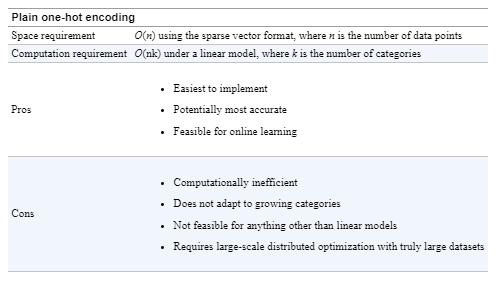

### Feature Hashing

A hash function is a deterministic function that maps a potentially unbounded integer to a finite integer range [1, m]. Since the input domain is potentially larger than the output range, multiple numbers may get mapped to the same output. This is called a collision. A uniform hash function ensures that roughly the same number of numbers are mapped into each of the m bins.

Visually, we can think of a hash function as a machine that intakes numbered balls (keys) and routes them to one of m bins. Balls with the same number will always get routed to the same bin. This maintains the feature space while reducing the storage and processing time during machine learning training and evaluation cycles.

Hash functions can be constructed for any object that can be represented numerically (which is true for any data that can be stored on a computer): numbers, strings, complex structures, etc.

When there are very many features, storing the feature vector could take up a lot of space. Feature hashing compresses the original feature vector into an m-dimensional vector by applying a hash function to the feature ID. For instance, if the original features were words in a document, then the hashed version would have a fixed vocabulary size of m, no matter how many unique words there are in the input. 

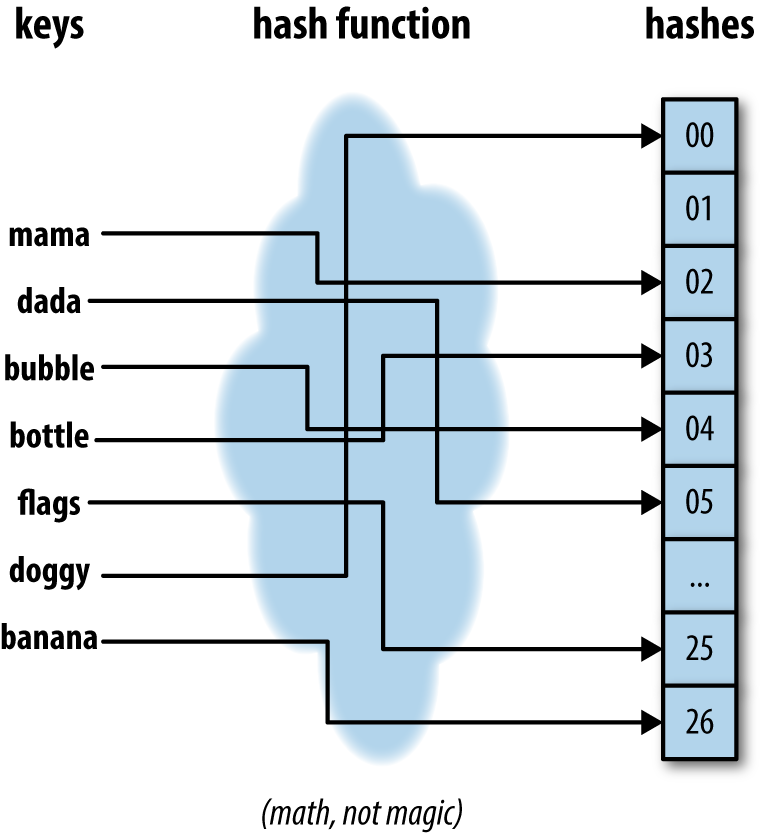

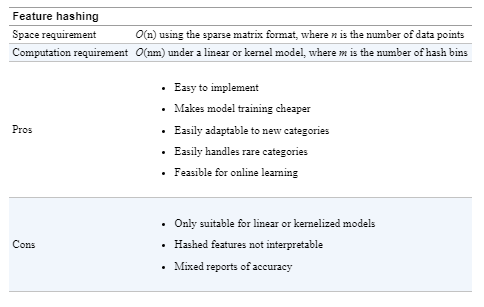

### Bin Counting

The idea of bin counting is deviously simple: rather than using the value of the categorical variable as the feature, instead use the conditional probability of the target under that value. In other words, instead of encoding the identity of the categorical value, we compute the association statistics between that value and the target that we wish to predict. 
This is the conditional probability of the class under the assumption that all features are independent.

In short, bin counting converts a categorical variable into statistics about the value. It turns a large, sparse, binary representation of the categorical variable, such as that produced by one-hot encoding, into a very small, dense, real-valued numeric representation.

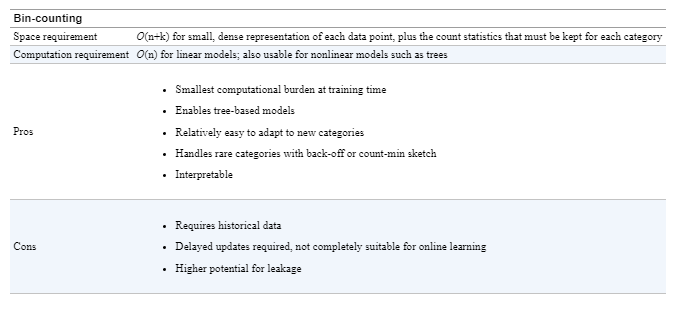

None of the methods are perfect. Which one to use depends on the desired model. Linear models are cheaper to train and therefore can handle noncompressed representations such as one-hot encoding. Tree-based models, on the other hand, need to do repeated searches over all features for the right split, and are thus limited to small representations such as bin counting. Feature hashing sits in between those two extremes, but with mixed reports on the resulting accuracy.